# Physics 261: Class 21
## 20 Mar 2024
<hr style="border-top: 1px solid purple; margin-top: 1px; border: 3px solid purple"></hr>
 The goals for today:

    1. Last class: histograms of letter frequency
    2. 4th order Runge-Kutta method
    3. Application to the simple non-linear pendulum
    
<hr style="margin-bottom: 1px; border: 3px solid purple"></hr>


# The Runge-Kutta Method 
## How 4th order (fixed time step) Runge-Kutta works

The 4th order Runge-Kutta (RK4) method is a fixed time step numerical method for solving ordinary differential equations (ODEs). It is a higher-order method, meaning that it provides a more accurate approximation to the solution than lower-order methods, such as the forward Euler method.

The basic idea behind the RK4 method is to use a weighted average of four estimates of the derivative of the solution at each time step. The four estimates are obtained by evaluating the derivative at different points within the time step, and the weights are chosen to give the highest possible accuracy.

Here are the steps for one time step of the RK4 method:

1. Evaluate the derivative of the solution at the beginning of the time step, i.e., at the current time `t`. This is the first estimate of the derivative, denoted `k1`.

2. Use `k1` to estimate the value of the solution at the midpoint of the time step, i.e., at `t + h/2`, where `h` is the time step. This is done by multiplying `k1` by `h/2` and adding the result to the current value of the solution, `y(t)`, to get an intermediate value, denoted `y1`.

3. Evaluate the derivative of the solution at the midpoint of the time step, i.e., at `t + h/2`, using the intermediate value `y1` as the input. This is the second estimate of the derivative, denoted `k2`.

4. Again use `k2` to estimate the value of the solution at the midpoint of the time step, i.e., at `t + h/2`, but this time using `y1` as the input. This gives a new intermediate value, denoted `y2`.

5. Evaluate the derivative of the solution at the end of the time step, i.e., at `t + h`, using `y2` as the input. This is the third estimate of the derivative, denoted `k3`.

6. Use `k3` to estimate the value of the solution at the end of the time step, i.e., at `t + h`, by multiplying `k3` by `h` and adding the result to the current value of the solution, `y(t)`, to get another intermediate value, denoted `y3`.

7. Finally, evaluate the derivative of the solution at the end of the time step, i.e., at `t + h`, using `y3` as the input. This is the fourth estimate of the derivative, denoted `k4`.

8. Use a weighted average of these four estimates to get the new value of the solution at the end of the time step, denoted `y(t+h)`. The weights are chosen to give the highest possible accuracy, and are:

 ```julia
 y(t+h) = y(t) + (1/6) * (k1 + 2k2 + 2k3 + k4) * h
 ```

This completes one time step of the RK4 method. The process is then repeated to compute the solution at subsequent time steps.

Overall, the RK4 method is a very popular and reliable method for solving ODEs numerically. It is especially useful for problems where high accuracy is required and the time step can be fixed.

------


## General idea for Newton's second law

To solve Newton's second law using the 4th order Runge-Kutta method, we need to first rewrite it as a system of first-order ODEs. Newton's second law is given by:

$$\vec{F} = m\vec{a}$$

where $\vec{F}$ is the net force acting on the object, $m$ is the mass, and $\vec{a}$ is the acceleration. Acceleration can be expressed as the derivative of velocity, $\vec{a} = d\vec{v}/dt$, and velocity can be expressed as the derivative of position, $\vec{v} = d\vec{x}/dt$. Therefore, we can rewrite Newton's second law as two first-order ODEs:

$$dx/dt = v$$

$$dv/dt = a = F_x(x, v, t) / m$$

Now we can apply the 4th order Runge-Kutta method to solve this system of ODEs. The general method for the 4th order Runge-Kutta is given by:

$$k_{1_x} = h \cdot f_x(t, x, v)$$

$$k_{1_v} = h \cdot f_v(t, x, v)$$

$$k_{2_x} = h \cdot f_x(t + \frac{h}{2}, x + \frac{k_{1_x}}{2}, v + \frac{k_{1_v}}{2})$$

$k_{2_v} = h \cdot f_v(t + \frac{h}{2}, x + \frac{k_{1_x}}{2}, v + \frac{k_{1_v}}{2})$

$$k_{3_x} = h \cdot f_x(t + \frac{h}{2}, x + \frac{k_{2_x}}{2}, v + \frac{k_{2_v}}{2}) $$

$$k_{3_v} = h \cdot f_v(t + \frac{h}{2}, x + \frac{k_{2_x}}{2}, v + \frac{k_{2_v}}{2}) $$

$$k_{4_x} = h \cdot f_x(t + h, x + k_{3_x}, v + k_{3_v})$$

$$k_{4_v} = h \cdot f_v(t + h, x + k_{3_x}, v + k_{3_v})$$

$$x_{\text{next}} = x + \frac{1}{6}(k_{1_x} + 2k_{2_x} + 2k_{3_x} + k_{4_x})$$

$$v_{\text{next}} = v + \frac{1}{6}(k_{1_v} + 2k_{2_v} + 2k_{3_v} + k_{4_v})$$

here, h is the time step, $f_x$ and $f_v$ are the functions that represent the derivatives of position and velocity with respect to time, respectively, and (k1_x, k1_v), (k2_x, k2_v), (k3_x, k3_v), and (k4_x, k4_v) are intermediate estimates of the derivatives. The method calculates the next position (x_next) and velocity (v_next) by combining the intermediate estimates with appropriate weights.

## Specific example for SHM with no damping

In this case, $f_x(t,x,v) = -\frac{k}{m} x$, and $f_v(t,x, v) = v$, so the Runge-Kutta equations become

$$k_{1v} =  -\frac{k}{m} x_n \Delta t,$$

$$k_{1x} = v_n \Delta t,$$

$$k_{2v} = -\frac{k}{m}(x_n + \frac{k_{1x}}{2}) \Delta t,$$

$$k_{2x} = (v_n + \frac{k_{1v}}{2})\Delta t,$$

$$k_{3v} = -\frac{k}{m}(x_n + \frac{k_{2x}}{2})\Delta t,$$

$$k_{3x} =  (v_n + \frac{k_{2v}}{2})\Delta t,$$

$$k_{4v} = -\frac{k}{m}(x_n + k_{3x}) \Delta t,$$

$$k_{4x} = (v_n + k_{3v})\Delta t, $$

and  then

$$\large v_{n+1} = v_n + \frac{k_{1v} + 2k_{2v} + 2k_{3v} + k_{4v}}{6}$$

$$\large x_{n+1} = x_n + \frac{k_{1x} + 2k_{2x} + 2k_{3x} + k_{4x}}{6}$$




## In Class / Homework
Using the 4th order Runge-Kutta method, let's revisit the simple harmonic oscillator: 

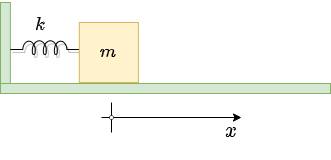

### Create a RK4 function
Now create a function called `RK4(x₀, v₀, tmax, Δt)` which computes and returns the:<br>
    a) position<br>
    b) velocity<br>
    c) kinetic energy, $K$<br>
    d) potential energy, $U$<br>
    e) total energy, $E=K+U$<br>
as functions of time.
The input parameters to this function are<br>
`x₀, v₀, tmax, Δt` <br>
the initial position ($x_0$), velocity ($v_0$), and the maximum simulation time (tmax), and the time step ($\Delta t$). Let's use $k/m \equiv 1.0$.

You might find it helpful to look at the notebook from class 10 (12 Feb). 
Compare the RK4 method to the Euler-Cromer method. For a given time step, how much better is RK4 at conserving energy?

You will find it helpful to revisit the notebook from Class 10. 

Upload your completed work by 10 am on Tuesday 26 Mar to https://www.dropbox.com/request/4Njt4ApewrQVfcJMkuaA

